<a href="https://colab.research.google.com/github/jaiderog/Learning-Computational-Social-Sciences/blob/master/CSC_limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>
<h1>TUTORIAL: LIMPIEZA DE DATOS CON PYTHON Y PANDAS</h1>

Notebook preparado por Codificando Beats [Video de Youtube](https://https://www.youtube.com/watch?v=bGnD1Ki7j-g)

Aportes: Jaider Ochoa Gutiérrez y Juan Fernando Pérez

#**1. El problema del negocio**

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#**2. El set de datos**

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#**3. Invocando el dataset**

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

ruta = "/content/drive/MyDrive/MCI_GyAData/dataset_banco.csv"
data = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_copia = pd.read_csv(ruta) #Para hacer copias solamente se crea una nueva variable para almacenar los datos en memoria

In [ ]:
#Mostrar el tamaño del dataframe y ver la estructura general
print(data.shape)
data.head()

In [ ]:
# Veamos las variables categóricas y las numéricas, las identificamos por int64 y float64
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#**4. Limpieza**

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [ ]:
data.dropna(inplace=True) # La función dropna() se utiliza para eliminar filas o columnas que contienen valores nulos o NaN (Not a Number) en un DataFrame de Pandas
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles') #Este ciclo utilizar un f-string para verificar cada columna del dataframe y ver el número de valores únicos

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

##4.3 Filas repetidas

In [ ]:
print(f'Tamaño del set antes  de eliminar las filas repetidas: {data.shape} ') #verificamos el tamaño original
data.drop_duplicates(inplace=True) #Recuerde que el inplace nos sirve para decirle a Pandas que modifique el dato en su registro original, cuando se pone en False crear una copia.
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}') #verificamos el tamaño luego de aplicar la función drop_duplicates la cual nos sirve para eliminar los datos duplicados.

Tamaño del set antes (45207, 17) de eliminar las filas repetidas: 
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

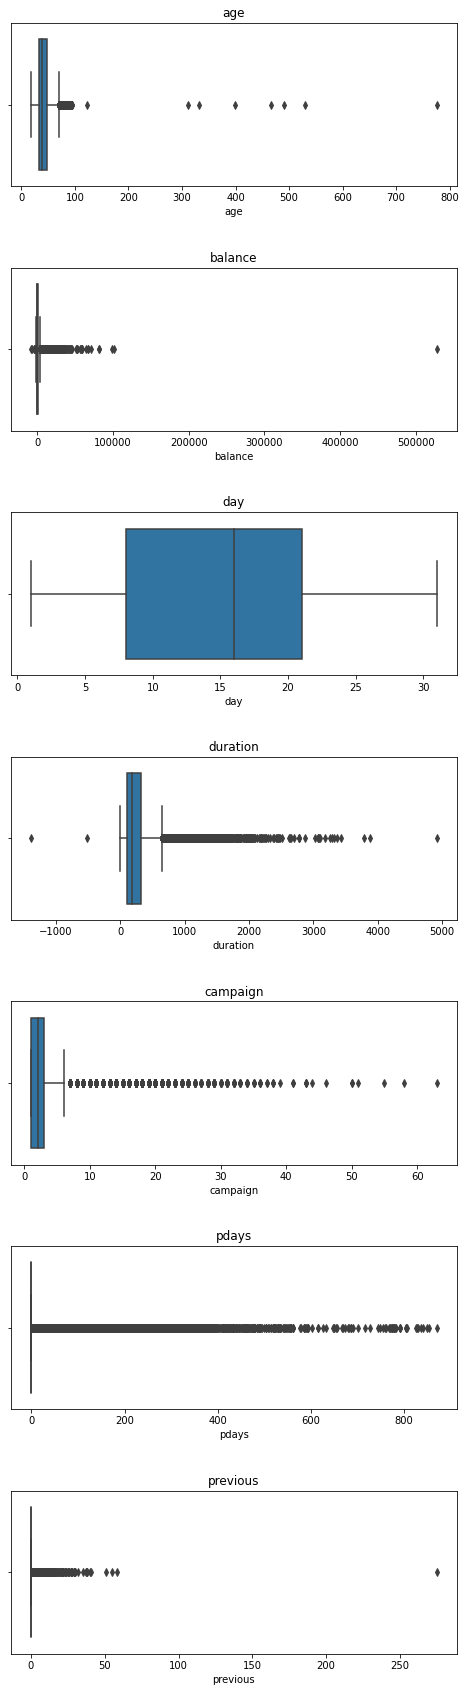

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**
- "age": hay sujetos con edades mucho mayores a 100 años
- "duration": hay valores negativos
- "previous": hay un valor extremadamente alto (cercano a 300)

In [ ]:
# Eliminar filas con "age">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data_copia = data[data['age']<=100]
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


In [ ]:
# Eliminar filas con "duration"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data[data['duration']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45190, 17)


In [ ]:
# Eliminar filas con "previous">100
print(f'Tamaño del set antes de eliminar registros de previous: {data.shape}')
data = data[data['previous']<=100]
print(f'Tamaño del set después de eliminar registros de previous: {data.shape}')

Tamaño del set antes de eliminar registros de previous: (45190, 17)
Tamaño del set después de eliminar registros de previous: (45189, 17)


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

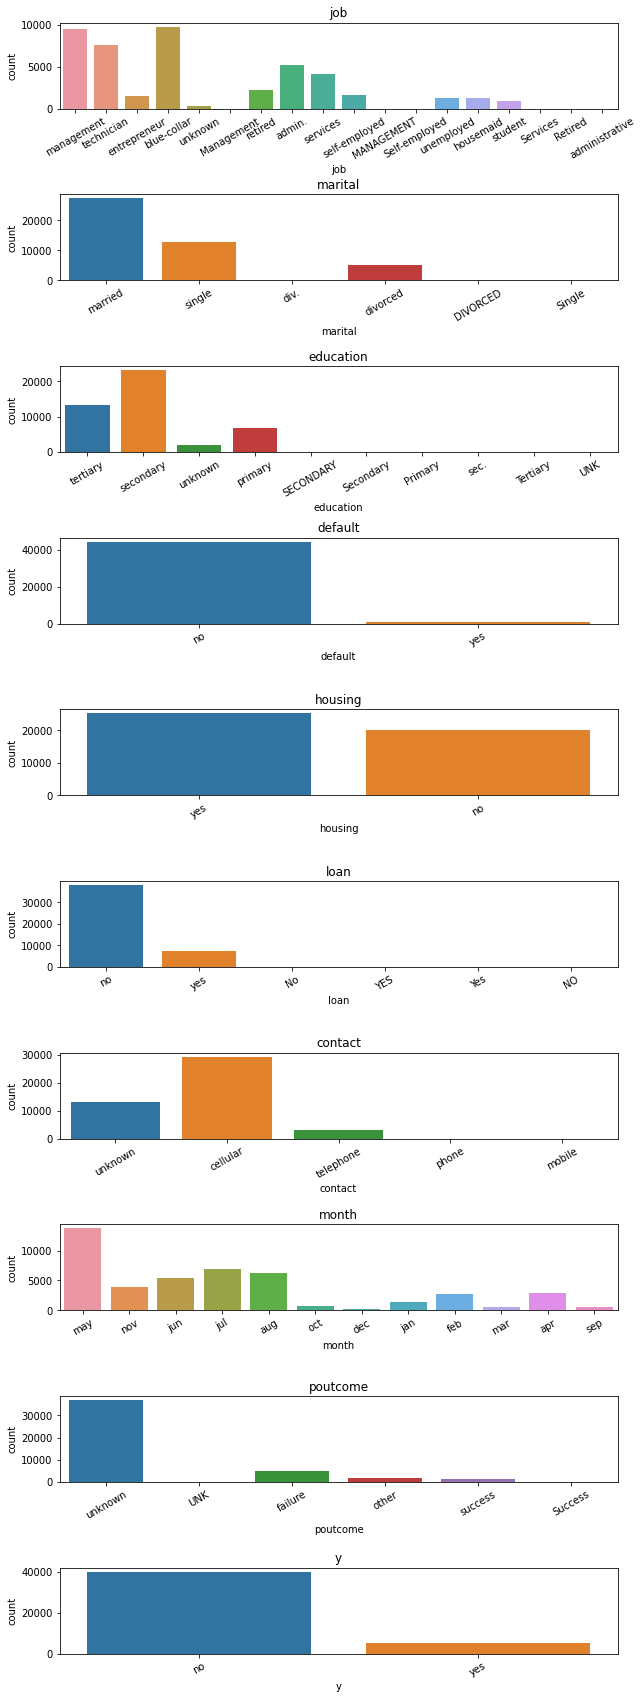

In [ ]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

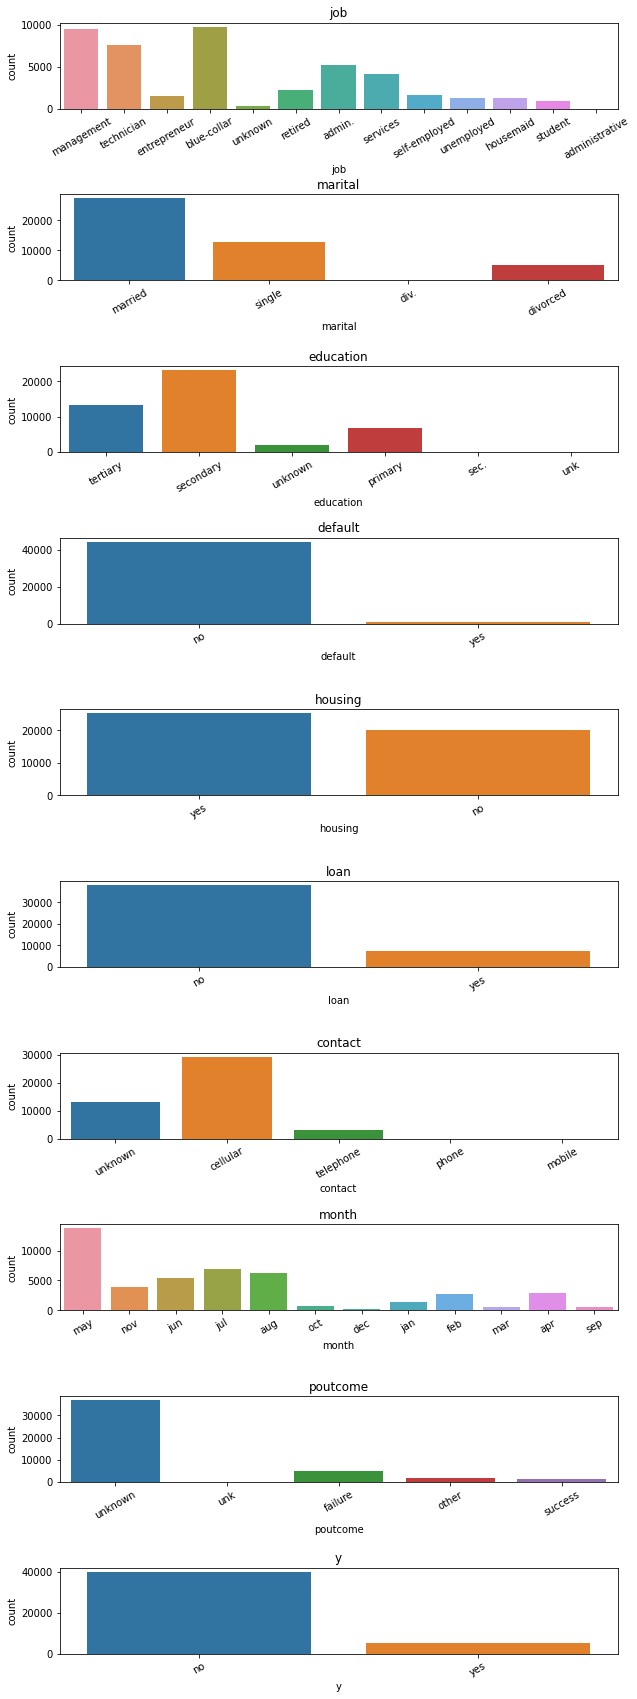

In [ ]:
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [ ]:
# job: unificar admin. y administrative
print(data['job'].unique())
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [ ]:
# marital: unificar div. y divorced
print(data['marital'].unique())
data['marital'] = data['marital'].str.replace('div.','divorced', regex=False)
print(data['marital'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [ ]:
# education: unificar sec. y secondary, unk y unknown
print(data['education'].unique())
data['education'] = data['education'].str.replace('sec.','secondary', regex=False)
data.loc[data['education']=='unk','education'] = 'unknown'
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [ ]:
# contact: unificar telephone y phone
print(data['contact'].unique())
data.loc[data['contact']=='phone','contact'] = 'telephone'
data.loc[data['contact']=='mobile','contact'] = 'cellular'
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [ ]:
# poutcome: unificar unk y unknown
print(data['poutcome'].unique())
data.loc[data['poutcome']=='unk','poutcome']='unknown'
print(data['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [ ]:
data.shape

(45189, 17)

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenía 45.215 registros y 17 columnas. El dataset resultante tiene 45.189 filas (26 menos) y 17 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [ ]:
ruta = "/gdrive/MyDrive/videos/2022-10-21/dataset_banco_clean.csv"
data.to_csv(ruta, index=False)

In [ ]:
datos = datos[datos["columna"] < z_score_threshold]

# **Resumen de acciones**

**Eliminar Valores Faltantes**

Puedes usar dropna() para eliminar filas o columnas con valores NaN, o fillna() para reemplazarlos por otro valor.

In [ ]:
df.dropna()  # Elimina filas con cualquier valor NaN
df.fillna(0)  # Reemplaza todos los NaN por 0

**Filtrado de datos**

Filtrado de datos seleccionar filas que cumplan ciertas condiciones.

In [ ]:
df[df['column_name'] == 'value']  # Selecciona filas donde la columna 'column_name' tenga el valor 'value'
df[df['column_name'].isin(['value1', 'value2'])]  # Selecciona filas donde la columna 'column_name' tenga los valores 'value1' o 'value2'
df[df['column_name'].isnull()]  # Selecciona filas donde la columna 'column_name' sea NaN

**Cambiar el tipo de datos de una columna**

Convertir tipos de datos de una columna, por ejemplo, de string a datetime.

In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])

**Eliminar Duplicados**

Remover filas duplicadas.

In [ ]:
df.drop_duplicates()

**Renombrar Columnas**

Cambiar el nombre de las columnas para hacerlas más descriptivas.

In [ ]:
df.rename(columns={'viejo_nombre': 'nuevo_nombre'})

**Normalización de Texto**

Limpiar y normalizar texto, como convertir a minúsculas, eliminar espacios extra, etc.

In [ ]:
df['texto'] = df['texto'].str.lower().str.strip()

**Dividir columnas en 2**

Identificar el caracter separador, por ejemplo: puntos, guiones, espacios, entre otros

In [ ]:
df[['NuevaCol1', 'NuevaCol2']] = df['ColumnaADividir'].str.split('-', expand=True)

# **5. Expresiones regulares**

## **5.1. Uso de las expresiones regulares**

Las expresiones regulares en Python, facilitadas por la librería **re**, son una herramienta muy potente para trabajar con cadenas de texto. Permiten buscar, coincidir, y manipular textos de manera muy eficiente y con pocas líneas de código

In [ ]:
import re

**Conceptos básicos de Regex**

**Metacaracteres:**

. : Cualquier caracter.

"*" : Cero o más repeticiones del caracter anterior

"+" : Una o más repeticiones del caracter anterior

? : Cero o una repeticiones del caracter anterior

^ : Inicio de la cadena

$ : Fin de la cadena


**Agrupaciones:**

() : Agrupar caracteres para formar una subcadena

Ejemplos:

^[a-zA-Z]+$: Buscar cadenas que solo contengan letras

\d{3}-\d{3}-\d{4}: Buscar números de teléfono en formato americano

"(.*)@(.*)\.(.*)": Extraer nombre de usuario, dominio y extensión de un correo electrónico

\d: cualquier dígito.

\D: (complemento de \d) cualquier caracter que no sea un dígito.

\s: cualquier espacio (espacio, tab, cambio de línea).

\S: (complemento de \s) cualquier caracter que no seas un espacio.

\w: cualquier caracter, incluye alfabeto, números.

\W: (complemento de \w) caracter diferente a los de alfabeto y numéricos.

\b bordes de las palabras, inicio y fin de palabras.

\B (complemento de \b) límites que tienen caracteres de palabras o no palabras en cada lado.

\p{nombre propiedad}: cualquier caracter con propiedad Unicode, por ejemplo: \p{Uppercase}

[abc]: a, b, o c.

[^abc]: cualquiera excepto a, b, o c.

[a-z]: todos los caracteres entre la a y la z. (de inicio a fin pero or)

### **Búsqueda de patrones**

La búsqueda de patrones se refiere a encontrar una secuencia específica de caracteres dentro de un texto. Este proceso es útil cuando necesitas saber si un texto contiene una palabra o frase específica.

In [ ]:
texto = "El cambio climático es un desafío urgente."
patron = "cambio"

# Busca el patrón dentro del texto
resultado = re.search(patron, texto)

if resultado:
    print("Se encontró la palabra:", resultado.group())
else:
    print("Palabra no encontrada.")

Se encontró la palabra: cambio


En este ejemplo, re.search() busca la primera ocurrencia del patrón "cambio" en el texto proporcionado.

In [ ]:
# Búsqueda de patrones con Regex
patron = r"[a-zA-Z0-9]+@[a-zA-Z]+\.[a-zA-Z]+"
correo = "correo_ejemplo@dominio.com"

resultado = re.search(patron, correo)

if resultado:
    print(f"Correo electrónico válido: {correo}")
else:
    print(f"Correo electrónico no válido: {correo}")

Correo electrónico válido: correo_ejemplo@dominio.com


### **Coincidencia de patrones**

La coincidencia de patrones implica encontrar todas las partes de un texto que se ajustan a un patrón específico. Esto es especialmente útil para patrones complejos, como direcciones de correo electrónico o números de teléfono.

In [ ]:
texto = "Mis correos electrónicos son contacto@ejemplo.com y email@ejemplo.es."
patron = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

# Encuentra todas las coincidencias del patrón
emails = re.findall(patron, texto)

print("Correos encontrados:", emails)

Correos encontrados: ['contacto@ejemplo.com', 'email@ejemplo.es']


Aquí, re.findall() encuentra todas las instancias que coinciden con el patrón de dirección de correo electrónico.

In [ ]:
# Extracción de datos con Regex
patron = r"\d+"
texto = "El precio del producto es de $100 y la oferta es de 20% de descuento."

resultados = re.findall(patron, texto)

print(f"Precios encontrados: {resultados}")

Precios encontrados: ['100', '20']


### **Sustitución de texto**

La sustitución de texto permite reemplazar texto que coincide con un patrón específico. Esto es útil para editar o formatear textos automáticamente.

In [ ]:
texto = "Los errores deben corregirse, no ignorarse."
patron = "errores"
sustituto = "problemas"

# Reemplaza el patrón en el texto
texto_modificado = re.sub(patron, sustituto, texto)

print(texto_modificado)

Los problemas deben corregirse, no ignorarse.


re.sub() busca el patrón "errores" y lo reemplaza por "problemas" en el texto.

In [ ]:
# Modificación de datos con Regex
patron = r"\d+"
texto = "El precio del producto es de $100 y la oferta es de 20% de descuento."

texto_modificado = re.sub(patron, "**", texto)

print(f"Texto modificado: {texto_modificado}")

Texto modificado: El precio del producto es de $** y la oferta es de **% de descuento.


### **División de texto**

La división de texto utiliza un patrón como delimitador para dividir un texto en varias partes. Esto es útil para separar texto en componentes, como palabras o frases.

In [ ]:
texto = "python,java;C#|JavaScript"
patron = r'[;,|]'

# Divide el texto en el patrón
lenguajes = re.split(patron, texto)

print("Lenguajes de programación:", lenguajes)

Lenguajes de programación: ['python', 'java', 'C#', 'JavaScript']


re.split() divide el texto en cada punto donde encuentra uno de los delimitadores especificados en el patrón (en este caso, coma ,, punto y coma ;, o barra vertical |), resultando en una lista de lenguajes de programación.

## **5.2. Análisis de Tweets y normalización con expresiones regulares**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **Cargar librerías**

In [ ]:
import pandas as pd
import re
from string import punctuation
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import io
import matplotlib.pyplot as plt

### **Cargue de datos**

**Método para cargar datos de manera local en Google Colab**

* Esto desplegará un botón que dice "Choose Files" en la salida de la celda.

* Al hacer clic en él, se abrirá una ventana de diálogo que te permite seleccionar uno o más archivos de tu computadora.

* Después de seleccionar el(los) archivo(s) y confirmar, el(los) archivo(s) se subirá(n) y estará(n) disponible(s) en el entorno de Colab.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tweets.csv to tweets.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['tweets.csv']), sep=";")
df

,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,@AlcaldiaBGA @JCardenasRey @CaracolBga @Caraco...,Aleksei,253,"Santander, Colombia",0,0,2021-06-23 13:14:12,[],"['AlcaldiaBGA', 'JCardenasRey', 'CaracolBga', ..."
1,El sábado 26 de junio comienza un nuevo #TourD...,Alejo Vargas R,1153,NaN,0,0,2021-06-23 13:11:03,['TourDeFrancia'],"['CaracolTV', 'jhonjaimeosorio']"
2,@CaracolTV @CaracolPlay Como asi q un capitán ...,Cloud Gate,153,Colombia,0,0,2021-06-23 13:10:06,[],"['CaracolTV', 'CaracolPlay']"
3,@CaracolTV @CaracolPlay El Desafío mas malo d ...,Cloud Gate,153,Colombia,0,0,2021-06-23 13:05:02,[],"['CaracolTV', 'CaracolPlay']"
4,"""Duque el aprendiz de Uribe que mata menores d...",Sabanalarga Piensa Más,129,NaN,0,0,2021-06-23 13:04:30,[],"['RevistaSemana', 'BluRadioCo', 'WRadioColombi..."
...,...,...,...,...,...,...,...,...,...
1357,@elespectador @MAFAPOCOLOMBIA A las madres que...,Gratiniano.es,2744,NaN,1,0,2021-06-15 10:09:37,[],"['elespectador', 'MAFAPOCOLOMBIA', 'ELTIEMPO',..."
1358,@LaGranNoticia @zonacero @WRadioColombia @Cana...,RUBEN LLANOS SARMIENTO,2,NaN,0,0,2021-06-15 8:43:16,[],"['LaGranNoticia', 'zonacero', 'WRadioColombia'..."
1359,@norha_patricia @DianeTriana @Ivanteacher69 @B...,Tata Giraldo =^_^= 🐾,523,"Dublín, Irlanda",1,0,2021-06-15 5:57:49,[],"['norha_patricia', 'DianeTriana', 'Ivanteacher..."
1360,@ENZOBRUNIL @CanalRCN @CaracolTV @WinSportsTV ...,Jorge Andres,3352,Colombia,1,0,2021-06-15 4:41:19,[],"['ENZOBRUNIL', 'CanalRCN', 'CaracolTV', 'WinSp..."


### **Limpieza de datos con expresiones regulares**

La función clean_text en el código dado es una función de limpieza de texto para un DataFrame de pandas. Su propósito es realizar una serie de transformaciones en una columna de texto especificada para eliminar elementos no deseados y normalizar el texto.

In [ ]:
def  clean_text(df, text_field):
  #Es una expresión regular que coincide con direcciones de correo electrónico y URLs. Busca secuencias de caracteres que son típicas en estos formatos
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  #Es una expresión regular que busca hashtags (palabras precedidas por #) y menciones (nombres de usuario precedidos por @)
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Convierte todo el texto de la columna especificada a minúsculas para estandarizar el texto
  df[text_field] = df[text_field].str.lower()
  # Utiliza la expresión regular patternURLEMAIL para encontrar y eliminar URLs y direcciones de email en el texto.
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))
  # Utiliza la expresión regular patternHashtagMention para encontrar y eliminar hashtags y menciones
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los signos de mayor que y menor que
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(\&gt\;)|(\&lt\;)','', elem))
  # Utilizamos una expresión regular también para eliminar a.m y p.m cuando mencionan horas
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(a\.m)|(p\.m)','', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r"""[‘’]""",' ', elem))
  non_words = list(punctuation)
  non_words.extend(['¿', '¡', '‘', '’'])
  #Elimina todos los signos de puntuación del texto, incluyendo algunos caracteres especiales en español como ¿ y ¡, y las comillas tipográficas
  df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))

  #Al final, la función retorna el DataFrame con la columna de texto limpia según los criterios definidos en la función
  return df

In [ ]:
#Generamos una copia del df, al mismo tiempo que llamamos la función y la aplicamos a la columna tweet
#Se puede aplicar a la columna de elección
dfclean=clean_text(df.copy(),"tweet")

La librería NLTK (Natural Language Toolkit) es una suite de herramientas para el procesamiento del lenguaje natural (PLN) en Python. Proporciona funciones y recursos para ayudar a trabajar con datos lingüísticos humanos, como textos escritos.

Estas dos líneas de código relevantes para trabajar con '**stopwords**', que son palabras que generalmente se consideran irrelevantes para el análisis de texto porque son muy comunes y no aportan significado importante, como preposiciones, conjunciones y artículos. En muchos idiomas, las 'stopwords' incluyen palabras como "de", "y", "en", etc.

In [ ]:
#Al ejecutar esta línea, NLTK descarga un conjunto de 'stopwords' de varios idiomas, lo que permite luego acceder a ellas desde el código
#Una vez que las 'stopwords' están disponibles, esta línea crea una lista de 'stopwords' en español. El método stopwords.words('spanish')
#devuelve una lista de 'stopwords' del idioma especificado, que en este caso es español.
nltk.download('stopwords')
stop = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


La variable stop ahora contiene una lista de palabras que pueden ser filtradas fuera de un texto para dejar solo las palabras significativas para el análisis. Por ejemplo, si estás realizando una tarea de análisis de sentimientos o cualquier otro tipo de procesamiento de lenguaje natural, es común eliminar estas palabras para centrarse en las que realmente influyen en el significado.

In [ ]:
#Posteriormente, al hacer stop.append("d") y stop.append("q"), estamos agregando las cadenas "d" y "q" a la lista de stopwords
stop.append("d")
stop.append("q")

1. dfclean['tweet']: este selecciona la columna 'tweet' del DataFrame dfclean.

2. .apply(lambda x: ...): el método apply se utiliza para aplicar una función a cada elemento de la columna. La función que se aplica es una función lambda, que es una pequeña función anónima definida en el momento. El x es la variable que representa cada elemento individual de la columna 'tweet', es decir, cada tweet.

3. ' '.join(...): esto toma una lista de palabras y las une en una cadena de texto (un tweet) separando cada palabra por un espacio. Es decir, reconstruye el tweet después de haber potencialmente eliminado algunas palabras.

4. [word for word in x.split() if word not in (stop)]: Esta es una comprensión de lista que se utiliza para crear una lista de palabras que no son stopwords.

* x.split(): Divide el tweet en palabras (el valor de x se divide por espacios, que es el comportamiento predeterminado de split()).

* for word in x.split(): Es un bucle que recorre cada palabra en el tweet dividido.

* if word not in (stop): Este es un condicional que filtra las palabras. Incluye la palabra en la lista resultante solo si la palabra no está en la lista stop de stopwords.

In [ ]:
dfclean['tweet'] = dfclean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
text = ' '.join(txt for txt in dfclean.tweet) #combina todos los textos de los tweets para hacer el wordcloud

Este código busca generar una nube de palabras (word cloud) en Python utilizando la biblioteca WordCloud. Este tipo de visualización es útil para representar gráficamente la frecuencia de las palabras en un conjunto de datos de texto, donde el tamaño de cada palabra en la nube indica su frecuencia o importancia

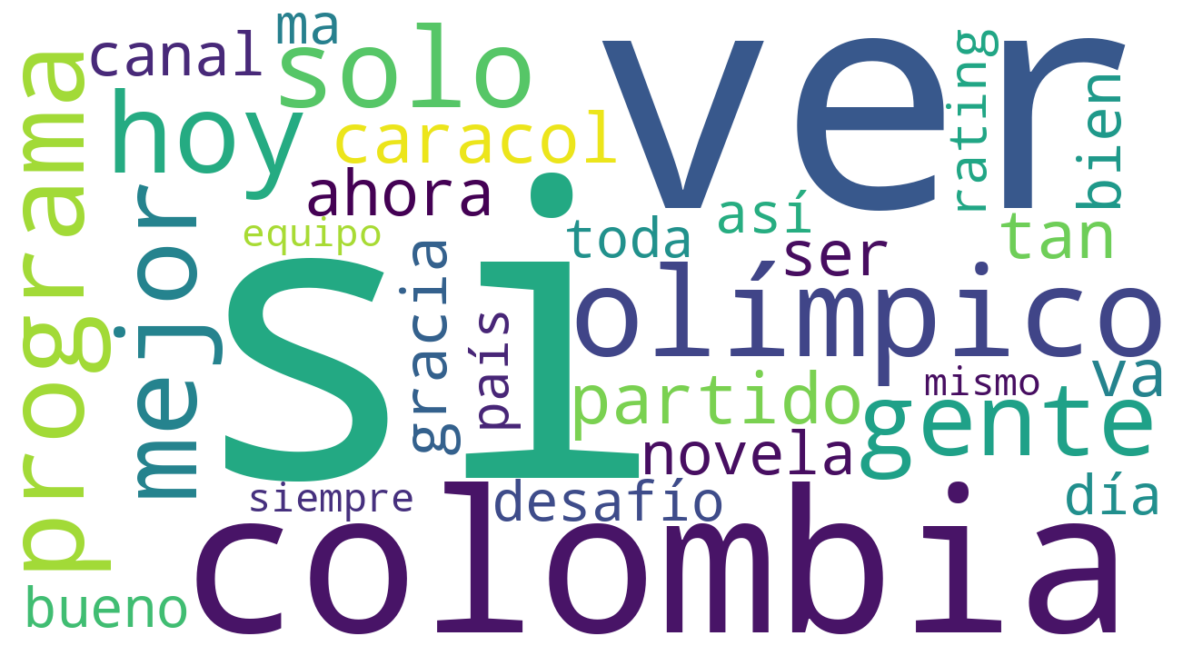

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=30, contour_width=5, contour_color='steelblue', width=1280, height=690)
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()